In [1]:
cd VisDA17/

/Users/pranjalgupta/Documents/domain_adaptation/VisDA17


In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Data Preprocessing

In [4]:
train_validation = pd.read_csv('train_validation.csv')
train_train = pd.read_csv('train_train.csv')

In [5]:
n_list = []
for i in range(2049):
    n_list.append(str(i))

In [6]:
def preprocess(x):
    col_names = list(x.columns)
    df_temp = pd.DataFrame(col_names)
    df_temp = df_temp.T
    x.columns = n_list
    df_temp.columns = n_list 
    df_new = pd.concat([df_temp, x]).reset_index(drop=True)
    return df_new

In [7]:
processed_train_validation = preprocess(train_validation)

In [8]:
train_train.columns = n_list

In [9]:
train_validation.head()
processed_train_validation

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.072639,0.499112,0.434132,0.083198,0.769916,0.118348,0.017374,0.051234,0.218571,0.595028,...,0.653926,0.158317,0.029896,0.095829,0.614174,0.440294,0.171968,0.400972,0.204867,4.000000
1,0.17477,0.426307,0.263003,0.089927,0.611682,0.126546,0.479191,0.211345,0.397743,0.260577,...,0.465741,0.160505,0.216472,0.262695,0.45587,0.248653,0.163447,0.26568,0.488878,3
2,0.166133,0.435502,0.666165,0.664302,0.968701,0.093478,0.618853,0.252837,0.417761,0.527509,...,0.700977,0.25281,0.276713,0.24558,0.530361,0.117131,0.223332,0.217703,0.342711,2
3,0.168355,0.082178,0.083082,0.731769,1.40427,0.201808,0.720339,0.203689,0.128185,1.53876,...,1.35747,0.065938,0.11997,0.208527,0.543308,0.144607,0.081495,0.343001,0.411405,10
4,0.42632,0.016337,0.27894,0.118287,0.426827,0.124699,0.547373,0.031645,0.725066,0.127075,...,0.456946,0.10922,0.232193,0.524799,0.439189,0.380236,0.046122,1.17623,0.273351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55383,0.424792,0.89977,0.063793,0.209213,1.59399,0.024616,1.11058,0.531962,0.113352,1.02561,...,1.01564,0.168447,0.042441,0.194534,0.094992,0.469219,0.111694,0.914614,1.60226,3
55384,0.312371,1.08728,0.677936,0.123091,0.436874,0.187996,0.033468,0.272372,0.197996,0.154091,...,0.516358,0.462732,0.371501,0.058603,0.26151,0.333167,0.399097,0.339613,0.175378,7
55385,0.087328,0.020529,0.177264,0.795762,0.565213,0.05932,0.977821,0.200136,0.05818,0.939436,...,0.686045,0.399481,0.167271,0.913339,0.458404,0.108615,0.067096,0.105445,0.102883,3
55386,0.053928,0.108577,0.192186,0.505346,1.14581,1.00218,0.482339,0.202115,0.069665,0.395421,...,0.151997,0.131625,0.086903,0.027217,0.741786,0.045459,0.324497,0.484799,0.383081,6


In [10]:
train_train

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.299771,0.511509,0.828543,0.019764,0.182132,0.007299,0.122813,0.003948,0.063968,0.273126,...,0.204556,0.888747,0.191974,0.782018,0.001261,0.738916,0.560403,0.038522,0.065525,7.0
1,0.225711,1.158407,0.710707,0.001759,0.254923,0.107571,0.483804,0.117319,0.050823,0.089911,...,0.369407,0.684917,0.112559,0.393860,0.008194,1.242947,0.217126,0.017542,0.009100,7.0
2,0.745959,0.123832,0.347789,0.920212,0.501937,0.291690,0.069421,1.277493,0.252142,0.281135,...,0.687543,0.852605,0.657274,0.939006,0.241401,0.122715,0.048302,0.101571,0.724318,11.0
3,0.003392,0.775114,0.120747,0.332695,0.364243,0.257741,0.051794,0.723782,0.268133,0.188663,...,0.009842,0.824354,1.084597,0.051092,0.181253,0.269883,0.618960,0.758847,0.675816,6.0
4,0.258227,0.538900,0.716632,0.005680,0.681763,0.000000,0.117516,0.109879,0.485876,0.099202,...,0.189304,0.067041,0.124631,0.131279,0.006564,0.218049,0.735380,0.788674,0.226990,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152391,0.841276,0.480788,0.278364,1.076535,0.805781,1.613166,0.971334,1.435103,0.456535,0.378424,...,1.108283,0.295676,0.645437,1.446912,0.089683,0.505884,0.117058,0.074087,0.034667,10.0
152392,0.209867,0.159488,0.374312,0.001313,0.308527,0.063426,0.094697,0.008711,0.728858,0.304033,...,0.359846,0.025460,0.040214,0.101976,0.069732,0.087505,0.261115,0.954588,0.159519,8.0
152393,0.021243,0.700005,0.539272,0.384460,0.326115,0.320055,0.066655,0.106291,0.127190,0.257473,...,0.232789,0.408214,0.644243,0.137900,0.429063,0.648880,0.910902,0.374764,1.009762,6.0
152394,0.577119,0.493479,0.032507,1.142845,1.882441,0.090198,0.581366,1.176283,0.240536,0.373180,...,0.055933,1.444496,0.360320,0.502127,0.165515,0.995883,0.031252,0.470380,0.319674,2.0


In [60]:
# extract n number of images for each class from the dataframes. 
def find_images(x, n):
    for i in range(12):
        x_temp = x[x['2048']==i]
        x_temp_dropped = x_temp.drop(columns=['2048'])
        x_n = x_temp_dropped.iloc[0:n]
        x_arr = x_n.to_numpy()
        if i==0:
            f_arr = x_arr
        else:
            f_arr = np.concatenate((f_arr, x_arr))
    return f_arr

In [62]:
n = 1000

In [63]:
real_features = find_images(processed_train_validation, n)

In [64]:
real_features.shape

(12000, 2048)

In [65]:
syn_features = find_images(train_train, n)

In [66]:
syn_features.shape

(12000, 2048)

In [76]:
syn_features

array([[0.359744, 0.417904, 0.549616, ..., 0.092457, 0.088131, 0.049311],
       [0.466131, 1.453661, 1.075784, ..., 0.369129, 0.447492, 0.121355],
       [0.389752, 0.49721 , 0.611394, ..., 0.281623, 0.076602, 0.116203],
       ...,
       [1.170628, 0.124062, 0.137636, ..., 0.169128, 0.341303, 0.89272 ],
       [0.04604 , 0.139518, 0.201461, ..., 0.035926, 0.041849, 0.559603],
       [0.      , 0.363832, 0.33586 , ..., 0.228646, 0.046212, 0.46298 ]])

In [77]:
syn_features = syn_features.astype('float32')
real_features = real_features.astype('float32')

In [67]:
def prepare_target(n):
    a = []
    for i in range(12):
        for j in range(n):
            a.append(i)
    return a

In [69]:
tar = prepare_target(n)
syn_target = tf.one_hot(tar, depth=12)
real_target = tf.one_hot(tar, depth=12)

In [70]:
syn_target

<tf.Tensor: shape=(12000, 12), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

# DANN Implementation

In [78]:
source_dataset = tf.data.Dataset.from_tensor_slices((syn_features, syn_target)).shuffle(200).batch(64)
da_dataset = tf.data.Dataset.from_tensor_slices((syn_features, syn_target, real_features, real_target)).shuffle(200).batch(32)
test_dataset2 = tf.data.Dataset.from_tensor_slices((real_features, real_target)).shuffle(200).batch(64) #Test Dataset over Target (used for training)

In [79]:
@tf.custom_gradient
def gradient_layer(x, lamda=1.0):
    y = tf.identity(x)
    def grad(dy):
        return lamda*-dy, None
    return y, grad

In [80]:
class GradientReversalLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
    
    def call(self, x, lamda=1.0):
        return gradient_layer(x, lamda)

In [81]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPool2D, Dense, Flatten

In [124]:
class DANN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        
#         self.feature_extractor_layer0 = Conv2D(32, kernel_size=(3,3), activation='relu')
#         self.feature_extractor_layer1 = BatchNormalization()
#         self.feature_extractor_layer2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))
#         self.feature_extractor_layer3 = Conv2D(64, kernel_size=(5, 5), activation='relu')
#         self.feature_extractor_layer4 = Dropout(0.5)
#         self.feature_extractor_layer5 = BatchNormalization()
#         self.feature_extractor_layer6 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))
        self.feature_extractor_layer0 = Dense(1024, activation='relu')
        self.feature_extractor_layer1 = Dense(256, activation='relu')
        
        #self.label_predictor_layer0 = Dense(100, activation='relu')
        #self.label_predictor_layer1 = Dense(100, activation='relu')
        self.label_predictor_layer2 = Dense(12, activation=None)
        
        self.domain_predictor_layer0 = GradientReversalLayer()
        self.domain_predictor_layer1 = Dense(100, activation='relu')
        self.domain_predictor_layer2 = Dense(2, activation=None)
        
    def call(self, x, train=False, source_train=True, lamda=1.0):
        #Feature Extractor
        x = self.feature_extractor_layer0(x)
        x = self.feature_extractor_layer1(x)
        #x = self.feature_extractor_layer2(x)
        
#         x = self.feature_extractor_layer3(x)
#         x = self.feature_extractor_layer4(x, training=train)
#         x = self.feature_extractor_layer5(x, training=train)
#         x = self.feature_extractor_layer6(x)
        
        #feature = tf.reshape(x, [-1, 53 * 53 * 64])
        feature = x
        
        #Label Predictor
        if source_train is True:
            feature_slice = feature
        else:
            feature_slice = tf.slice(feature, [0, 0], [feature.shape[0] // 2, -1])
        
        #lp_x = self.label_predictor_layer0(feature_slice)
        #lp_x = self.label_predictor_layer1(lp_x)
        l_logits = self.label_predictor_layer2(feature_slice)
        
        #Domain Predictor
        if source_train is True:
            return l_logits
        else:
            dp_x = self.domain_predictor_layer0(feature, lamda)    #GradientReversalLayer
            dp_x = self.domain_predictor_layer1(dp_x)
            d_logits = self.domain_predictor_layer2(dp_x)
            
            return l_logits, d_logits

In [125]:
model = DANN()

In [126]:
#def loss_func(input_logits, target_labels):
#    loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
#    return tf.reduce_mean(loss_function(target_labels, input_logits))
def loss_func(input_logits, target_labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=input_logits, labels=target_labels))

def get_loss(l_logits, labels, d_logits=None, domain=None):
    if d_logits is None:
        return loss_func(l_logits, labels)
    else:
        return loss_func(l_logits, labels) + loss_func(d_logits, domain)


model_optimizer = tf.optimizers.SGD()

In [127]:
domain_labels = np.vstack([np.tile([1., 0.], [32, 1]),
                           np.tile([0., 1.], [32, 1])])
domain_labels = domain_labels.astype('float32')

In [128]:
epoch_accuracy = tf.keras.metrics.CategoricalAccuracy()
source_acc = []  # Source Domain Accuracy while Source-only Training
da_acc = []      # Source Domain Accuracy while DA-training
test2_acc = []   # Target Domain (used for Training) Accuracy

In [129]:
@tf.function
def train_step_source(s_images, s_labels, lamda=1.0):
    images = s_images
    labels = s_labels
    
    with tf.GradientTape() as tape:
        output = model(images, train=True, source_train=True, lamda=lamda)
        
        model_loss = get_loss(output, labels)
        epoch_accuracy(output, labels)
        
    gradients_mdan = tape.gradient(model_loss, model.trainable_variables)
    model_optimizer.apply_gradients(zip(gradients_mdan, model.trainable_variables))

In [130]:
@tf.function
def train_step_da(s_images, s_labels, t_images=None, t_labels=None, lamda=1.0):
    images = tf.concat([s_images, t_images], 0)
    labels = s_labels
    
    with tf.GradientTape() as tape:
        output = model(images, train=True, source_train=False, lamda=lamda)
        
        model_loss = get_loss(output[0], labels, output[1], domain_labels)
        epoch_accuracy(output[0], labels)
        
    gradients_mdan = tape.gradient(model_loss, model.trainable_variables)
    model_optimizer.apply_gradients(zip(gradients_mdan, model.trainable_variables))

In [131]:
@tf.function
def test_step(t_images, t_labels):
    images = t_images
    labels = t_labels
    
    output = model(images, train=False, source_train=True)
    epoch_accuracy(output, labels)

In [132]:
def train(train_mode, epochs):
    
    if train_mode == 'source':
        dataset = source_dataset
        train_func = train_step_source
        acc_list = source_acc
    elif train_mode == 'domain-adaptation':
        dataset = da_dataset
        train_func = train_step_da
        acc_list = da_acc
    else:
        raise ValueError("Unknown training Mode")
    
    for epoch in range(epochs):
        p = float(epoch) / epochs
        lamda = 2 / (1 + np.exp(-100 * p, dtype=np.float32)) - 1
        lamda = lamda.astype('float32')

        for batch in dataset:
            train_func(*batch, lamda=lamda)
        
        print("Training: Epoch {} :\t Source Accuracy : {:.3%}".format(epoch, epoch_accuracy.result()))
        acc_list.append(epoch_accuracy.result())
        test()
        epoch_accuracy.reset_states()

In [133]:
def test():
    epoch_accuracy.reset_states()
    
    '''#Testing Dataset (Target Domain)
    for batch in test_dataset:
        test_step(*batch)
        
    print("Testing Accuracy : {:.3%}".format(epoch_accuracy.result()), end='  |  ')
    test_acc.append(epoch_accuracy.result())
    epoch_accuracy.reset_states()'''
    
    #Target Domain (used for Training)
    for batch in test_dataset2:
        test_step(*batch)
    
    print("Target Domain Accuracy : {:.3%}".format(epoch_accuracy.result()))
    test2_acc.append(epoch_accuracy.result())
    epoch_accuracy.reset_states()

In [134]:
train('source', 5)

Training: Epoch 0 :	 Source Accuracy : 94.025%
Target Domain Accuracy : 8.683%
Training: Epoch 1 :	 Source Accuracy : 97.367%
Target Domain Accuracy : 13.692%
Training: Epoch 2 :	 Source Accuracy : 98.717%
Target Domain Accuracy : 20.633%
Training: Epoch 3 :	 Source Accuracy : 98.983%
Target Domain Accuracy : 23.908%
Training: Epoch 4 :	 Source Accuracy : 99.108%
Target Domain Accuracy : 28.150%


In [117]:
no = 1199
ti = syn_features[no]
ti = np.expand_dims(ti, axis=0)
predd = tf.nn.softmax(model(ti, train=True, source_train=True, lamda=1.0))
print(predd)
print(syn_target[no])

tf.Tensor(
[[1.3491959e-07 9.9900913e-01 5.4283920e-08 5.9102084e-10 3.8859307e-07
  3.5910719e-07 3.1766400e-04 3.4435321e-05 1.2311645e-04 1.5078674e-04
  3.2111289e-04 4.2848504e-05]], shape=(1, 12), dtype=float32)
tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(12,), dtype=float32)


In [135]:
train('domain-adaptation', 100)

Training: Epoch 0 :	 Source Accuracy : 99.483%
Target Domain Accuracy : 27.858%
Training: Epoch 1 :	 Source Accuracy : 99.467%
Target Domain Accuracy : 14.183%
Training: Epoch 2 :	 Source Accuracy : 99.517%
Target Domain Accuracy : 14.758%
Training: Epoch 3 :	 Source Accuracy : 99.392%
Target Domain Accuracy : 14.125%
Training: Epoch 4 :	 Source Accuracy : 99.367%
Target Domain Accuracy : 18.317%
Training: Epoch 5 :	 Source Accuracy : 99.517%
Target Domain Accuracy : 21.042%
Training: Epoch 6 :	 Source Accuracy : 99.650%
Target Domain Accuracy : 26.075%
Training: Epoch 7 :	 Source Accuracy : 99.600%
Target Domain Accuracy : 24.342%
Training: Epoch 8 :	 Source Accuracy : 99.608%
Target Domain Accuracy : 25.825%
Training: Epoch 9 :	 Source Accuracy : 99.608%
Target Domain Accuracy : 30.792%
Training: Epoch 10 :	 Source Accuracy : 99.658%
Target Domain Accuracy : 25.325%
Training: Epoch 11 :	 Source Accuracy : 99.692%
Target Domain Accuracy : 21.875%
Training: Epoch 12 :	 Source Accuracy 

In [122]:
import matplotlib 
from matplotlib import pyplot as plt


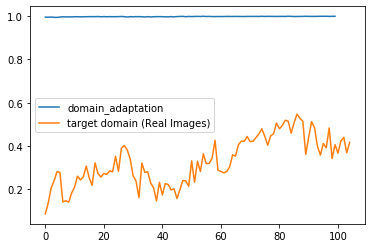

In [136]:
plt.plot(da_acc, label='domain_adaptation')
plt.plot(test2_acc, label = 'target domain (Real Images)')
plt.legend()